<a href="https://colab.research.google.com/github/arpitkj/Image-Captioning/blob/main/image_captioning_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# caption preprocessing



In [ ]:


#1
# Import all required modules
import nltk

# DO this download only once
nltk.download('stopwords')
nltk.download('punkt')

import itertools
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
from PIL import Image
from PIL import ImageFilter
import os
import time



# generate all stop words
stop_words = set(stopwords.words("english"))
# print(f"Stop Words are:- {stop_words} ")



# load caption file and separate each image_id along with image description

def load_caption_file(filename):
	file = open(filename, 'r')
	text = file.read()
	file.close()
	return text
 
# extract image descriptions
def load_image_descriptions(doc):
	mapping = dict()
	for line in doc.split('\n'):
		tokens = line.split()
		if len(line) < 2:
			continue
		image_id, image_desc = tokens[0], tokens[1:]
		image_id = image_id.split('.')[0]
		image_desc = ' '.join(image_desc)
		if image_id not in mapping:
			mapping[image_id] = image_desc
	return mapping
 

# path of caption/token/description file for dataset and all function calls
filename = r'/content/drive/MyDrive/flickr/Flickr8k.token.txt'
doc = load_caption_file(filename)
descriptions = load_image_descriptions(doc)
print("For image id 1007320043_627395c3d8 :-", descriptions['1007320043_627395c3d8'])
print('Loaded: %d ' % len(descriptions))



# for printing only first five descriptions from dictionary
# x = itertools.islice(descriptions.items(), 0, 5)
    

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
For image id 1007320043_627395c3d8 :- A child playing on a rope net .
Loaded: 8092 


In [ ]:
#2 (for test data)
# remove stopwords and words having length < 2.....store all valid words in contain_all_words,a set() data str.
# Separate dictionaries are created having id and list of words in that image id.....finally added to the list->img_list
def create_token(img_id,img_cap):
	wrd = word_tokenize(img_cap)
	res = []
	for w in wrd:
		if w not in stop_words and len(w) > 2:
			contain_all_words.append(w)
			res.append(w)
	d = {img_id : res}
	img_list.append(d)



# obtain id and desc from dictionary of filtered images
def remove_stopwords(my_dict,descriptions):
	for img_id in my_dict.keys():
		if img_id not in descriptions: 
			continue
		create_token(img_id,descriptions[img_id])



def filter_images():
	inPath ="drive/MyDrive/flickr/Images_test"
	my_dict = dict()
	print("Running.....")
	c = 0
	for imagePath in os.listdir(inPath):
		# imagePath contains name/id of the image
		inputPath = os.path.join(inPath, imagePath)
		img = Image.open(inputPath)
		imagePath = imagePath.split('.')[0]
		my_dict[imagePath]=1
		c += 1

	print(f"Total Entries of images :- {c}")
	return my_dict


contain_all_words = list()
img_list = list()

my_dict = filter_images()
remove_stopwords(my_dict,descriptions)
total_ids = len(img_list)
total_words = len(contain_all_words)

print(f"Image Dataset Description:- {total_ids}")
print(f"A list containg all the words : - {total_words}")

Running.....
Total Entries of images :- 505
Image Dataset Description:- 505
A list containg all the words : - 3121


In [ ]:
#3 (for train data)
# remove stopwords and words having length < 3.....store all valid words in contain_all_words,a set() data str.
# Separate dictionaries are created having id and list of words in that image id.....finally added to the list->img_list
def create_token1(img_id,img_cap):
	wrd = word_tokenize(img_cap)
	res = []
	for w in wrd:
		if w not in stop_words and len(w) > 2:
			contain_all_words.append(w)
			res.append(w)
	d = {img_id : res}
	img_list1.append(d)



# obtain id and desc from dictionary of filtered images
def remove_stopwords1(my_dict,descriptions):
	for img_id in my_dict.keys():
		if img_id not in descriptions: 
			continue
		create_token1(img_id,descriptions[img_id])



def filter1():
	inPath ="drive/MyDrive/flickr/Images_train"
	my_dict = dict()
	print("Running.....")
	c = 0
	for imagePath in os.listdir(inPath):
		# imagePath contains name/id of the image
		inputPath = os.path.join(inPath, imagePath)
		img = Image.open(inputPath)
		#if ((img.size[0]*img.size[1])==166500) and (img.size[0]==500):
		imagePath = imagePath.split('.')[0]
		my_dict[imagePath]=1
		c += 1

	print(f"Total Entries of images :- {c}")
	return my_dict


#contain_all_words1 = list()
img_list1 = list()

my_dict1 = filter1()
remove_stopwords1(my_dict1,descriptions)
total_ids = len(img_list1)
total_words = len(contain_all_words)

print(f"Image Dataset Description:- {total_ids}")
print(f"A list containg all the words : - {total_words}")

Running.....
Total Entries of images :- 7586
Image Dataset Description:- 7586
A list containg all the words : - 50166


In [ ]:
# 4
#Creating a list of all unique words with frequency>1

fr1=dict()
for word in contain_all_words:
    if(word in fr1):
        fr1[word]+=1
    else:
        fr1[word]=1

unique_words1=[]
for x,y in fr1.items():
    if y>1:
        unique_words1.append(x)
        
print(f"Total unique words in both test and train data are:-{len(unique_words1)}")

Total unique words in both test and train data are:-2271


In [ ]:
#5
#using POS tagger 
import nltk
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize, sent_tokenize

tag=[]
for i in unique_words1:
      
    wordsList = nltk.word_tokenize(i)
  
    tagged = nltk.pos_tag(wordsList)
    tag.append(tagged)


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
#6
noun=[] #containing singular nouns
verb_base = []
verbs_other = []
i=0
for x in tag:

    if x[0][1] =='NN':
      noun.append(x[0][0])
    elif x[0][1] == 'VB':
      verb_base.append(x[0][0])
    elif x[0][1] == 'VBD' or x[0][1] == 'VBG':
      verbs_other.append(x[0][0])

total_unique_words1=len(noun)
total_unique_verbs = len(verb_base)
total_unique_verbs_other = len(verbs_other)
print(f"total unique singular nouns occurring atleast twice: {total_unique_words1}") 
print(f"total unique base form of verbs occurring atleast twice: {total_unique_verbs}") 
print(f"total unique verbs occurring atleast twice: {total_unique_verbs_other}") 

total unique singular nouns occurring atleast twice: 1264
total unique base form of verbs occurring atleast twice: 11
total unique verbs occurring atleast twice: 230


In [ ]:

#6
noun=[] #containing singular nouns
nouns=[]
verb=[]
i=0
for x in tag:

    if x[0][1] =='NN'or x[0][1] =='NNS':
        noun.append(x[0][0])

    #if x[0][1] =='NNS':
    #  nouns.append(x[0][0])

    if x[0][1] =='VB' or x[0][1]=='VBD' or x[0][1]=='VBG':
        verb.append(x[0][0])

total_unique_words1=len(noun)
print(f"total unique singular nouns occurring atleast twice: {total_unique_words1}") 
print(len(verb))


total unique singular nouns occurring atleast twice: 1732
241


In [ ]:
len(nouns)

0

In [ ]:
or x[0][1] =='VB' or x[0][1]=='VBD' or x[0][1]=='VBG'


In [ ]:
#verb

In [ ]:
#noun

In [ ]:
#7
# Create matrix using dictionary for test data
start_time = time.time()

mat = dict()
# l = [0]*total_unique_words#earlier total_words was used

for d in img_list:
	k = list(d.keys())
	v = d[k[0]]
	v = set(v)
	k = k[0]
	mat[k] = [0]*total_unique_words1
	i = 0
	for w in noun:#earlier contain_all_words was used
		if w in v:
			mat[k][i] = 1#(1,w)
		else:
			mat[k][i] = 0
		i += 1



# For printing entire matrix...:o :o :o :(

#print(f"\n for id 1007320043_627395c3d8 - {mat['1007320043_627395c3d8']}")
# for k,v in mat.items():
# 	print(k,v)


end_time = time.time()
print("Time Taken for creation of matrix :-",abs(end_time-start_time))

Time Taken for creation of matrix :- 0.19938278198242188


In [ ]:
#8
#creating 2D numpy array (test labels) from above dictionary
import numpy as np
l=list()

for x,y in mat.items():
    l.append(y)

y_test=np.array(l)
print(y_test.shape)

(505, 1732)


In [ ]:
#9
# Create matrix using dictionary for training data
start_time1 = time.time()

mat1 = dict()
# l = [0]*total_unique_words

for d in img_list1:
	k = list(d.keys())
	v = d[k[0]]
	v = set(v)
	k = k[0]
	mat1[k] = [0]*total_unique_words1
	i = 0
	for w in noun:
		if w in v:
			mat1[k][i] = 1#(1,w)
		else:
			mat1[k][i] = 0
		i += 1



# For printing entire matrix...:o :o :o :(

print(f"\n for id 1417295167_5299df6db8 - {mat1['1417295167_5299df6db8']}")
# for k,v in mat.items():
# 	print(k,v)


end_time1 = time.time()
print("Time Taken for creation of matrix :-",abs(end_time1-start_time1))


 for id 1417295167_5299df6db8 - [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
#10
#creating 2D numpy array (train labels) from above dictionary
l=list()

for x,y in mat1.items():
    l.append(y)

y_train=np.array(l)

print(y_train.shape)

(7586, 1732)


# image preprocessing

In [ ]:
#11
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout, InputLayer, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [ ]:
#12
img_size = 150
def get_data(data_dir):
    data = [] 
  
        
    for img in os.listdir(data_dir):
        try:
            img_arr = cv2.imread(os.path.join(data_dir, img))[...,::-1] #convert BGR to RGB format
            resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
            data.append(resized_arr)
        except Exception as e:
            print(e)
            
    return np.array(data)

#fetching our train and validation data.
train = get_data("drive/MyDrive/flickr/Images_train")
val = get_data("drive/MyDrive/flickr/Images_test")

In [ ]:
#13
#normalisation
x_train = (train) / 255
x_test = (val) / 255

In [ ]:
#14
#shape of x_train
print(x_train.shape)
print(x_train[0].shape)

#shape of x_test
print(x_test.shape)
print(x_test[0].shape)

(7586, 150, 150, 3)
(150, 150, 3)
(505, 150, 150, 3)
(150, 150, 3)


# building model

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        #rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.5, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False,     # randomly flip images
        brightness_range=[0.4,1.0]) 


datagen.fit(x_train)

In [ ]:

#15
# build a sequential model
model = Sequential()
model.add(InputLayer(input_shape=(150, 150, 3)))

# 1st conv block
model.add(Conv2D(64, (3,3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3,3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
# 2nd conv block
model.add(Conv2D(128, (3,3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(128, (3,3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# 3rd conv block
model.add(Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# 4th conv block
model.add(Conv2D(512, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(Conv2D(512, (5, 5), activation='relu', strides=(2, 2), padding='same'))
model.add(MaxPool2D(pool_size=(2, 2), padding='valid'))
model.add(BatchNormalization())
# ANN block
model.add(Flatten())
model.add(Dense(units=5000, activation='relu'))
model.add(Dense(units=3000, activation='relu'))
# output layer
model.add(Dense(units=1732, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])
# fit on data for 45 epochs
model.fit(x_train, y_train, epochs=45, validation_data=(x_test, y_test))


Epoch 1/45
238/238 [==============================] - 81s 186ms/step - loss: 0.0185 - accuracy: 0.1533 - val_loss: 0.0137 - val_accuracy: 0.1901
Epoch 2/45
238/238 [==============================] - 41s 173ms/step - loss: 0.0136 - accuracy: 0.1706 - val_loss: 0.0134 - val_accuracy: 0.1901
Epoch 3/45
238/238 [==============================] - 42s 176ms/step - loss: 0.0133 - accuracy: 0.1760 - val_loss: 0.0153 - val_accuracy: 0.1010
Epoch 4/45
238/238 [==============================] - 42s 178ms/step - loss: 0.0131 - accuracy: 0.1824 - val_loss: 0.0130 - val_accuracy: 0.2059
Epoch 5/45
238/238 [==============================] - 43s 180ms/step - loss: 0.0128 - accuracy: 0.1864 - val_loss: 0.0133 - val_accuracy: 0.2059
Epoch 6/45
238/238 [==============================] - 43s 181ms/step - loss: 0.0126 - accuracy: 0.1855 - val_loss: 0.0146 - val_accuracy: 0.1149
Epoch 7/45
238/238 [==============================] - 43s 181ms/step - loss: 0.0123 - accuracy: 0.1909 - val_loss: 0.0131 - val_ac

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

losses=pd.DataFrame(model.history.history)


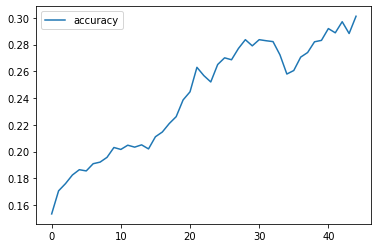

In [ ]:
accuracy=losses.drop(['loss','val_loss', 'val_accuracy'], axis=1)
accuracy.plot()

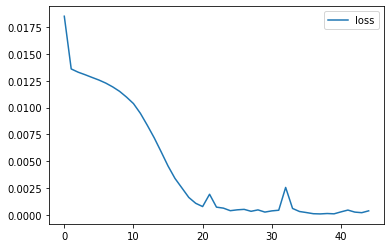

In [ ]:
loss=losses.drop(['accuracy','val_accuracy', 'val_loss'], axis=1)
loss.plot()

In [ ]:
Epoch 1/45
190/190 [==============================] - 76s 209ms/step - loss: 0.0203 - accuracy: 0.1577 - val_loss: 0.0141 - val_accuracy: 0.2096
Epoch 2/45
190/190 [==============================] - 36s 189ms/step - loss: 0.0139 - accuracy: 0.1821 - val_loss: 0.0146 - val_accuracy: 0.2431
Epoch 3/45
190/190 [==============================] - 37s 193ms/step - loss: 0.0135 - accuracy: 0.1877 - val_loss: 0.0145 - val_accuracy: 0.2002
Epoch 4/45
190/190 [==============================] - 36s 191ms/step - loss: 0.0131 - accuracy: 0.2011 - val_loss: 0.0142 - val_accuracy: 0.1677
Epoch 5/45
190/190 [==============================] - 36s 191ms/step - loss: 0.0127 - accuracy: 0.1973 - val_loss: 0.0140 - val_accuracy: 0.2253
Epoch 6/45
190/190 [==============================] - 36s 192ms/step - loss: 0.0121 - accuracy: 0.2083 - val_loss: 0.0143 - val_accuracy: 0.2318
Epoch 7/45
190/190 [==============================] - 36s 192ms/step - loss: 0.0115 - accuracy: 0.1976 - val_loss: 0.0143 - val_accuracy: 0.1603
Epoch 8/45
190/190 [==============================] - 36s 192ms/step - loss: 0.0106 - accuracy: 0.2022 - val_loss: 0.0149 - val_accuracy: 0.1810
Epoch 9/45
190/190 [==============================] - 37s 192ms/step - loss: 0.0094 - accuracy: 0.1989 - val_loss: 0.0180 - val_accuracy: 0.0804
Epoch 10/45
190/190 [==============================] - 36s 192ms/step - loss: 0.0078 - accuracy: 0.1992 - val_loss: 0.0186 - val_accuracy: 0.1341
Epoch 11/45
190/190 [==============================] - 36s 192ms/step - loss: 0.0062 - accuracy: 0.1862 - val_loss: 0.0208 - val_accuracy: 0.0971
Epoch 12/45
190/190 [==============================] - 36s 192ms/step - loss: 0.0046 - accuracy: 0.1786 - val_loss: 0.0246 - val_accuracy: 0.0878
Epoch 13/45
190/190 [==============================] - 37s 192ms/step - loss: 0.0032 - accuracy: 0.1742 - val_loss: 0.0232 - val_accuracy: 0.0927
Epoch 14/45
190/190 [==============================] - 37s 192ms/step - loss: 0.0022 - accuracy: 0.1799 - val_loss: 0.0269 - val_accuracy: 0.1109
Epoch 15/45
190/190 [==============================] - 37s 192ms/step - loss: 0.0015 - accuracy: 0.1851 - val_loss: 0.0295 - val_accuracy: 0.0823
Epoch 16/45
190/190 [==============================] - 37s 192ms/step - loss: 9.8739e-04 - accuracy: 0.1900 - val_loss: 0.0281 - val_accuracy: 0.1031
Epoch 17/45
190/190 [==============================] - 37s 192ms/step - loss: 7.1199e-04 - accuracy: 0.2075 - val_loss: 0.0332 - val_accuracy: 0.0981
Epoch 18/45
190/190 [==============================] - 37s 192ms/step - loss: 5.5986e-04 - accuracy: 0.2174 - val_loss: 0.0343 - val_accuracy: 0.1060
Epoch 19/45
190/190 [==============================] - 37s 192ms/step - loss: 4.6419e-04 - accuracy: 0.2172 - val_loss: 0.0340 - val_accuracy: 0.0823
Epoch 20/45
190/190 [==============================] - 37s 192ms/step - loss: 4.4047e-04 - accuracy: 0.2321 - val_loss: 0.0347 - val_accuracy: 0.1050
Epoch 21/45
190/190 [==============================] - 36s 192ms/step - loss: 4.5491e-04 - accuracy: 0.2416 - val_loss: 0.0344 - val_accuracy: 0.1060
Epoch 22/45
190/190 [==============================] - 37s 192ms/step - loss: 4.7959e-04 - accuracy: 0.2489 - val_loss: 0.0357 - val_accuracy: 0.0819
Epoch 23/45
190/190 [==============================] - 36s 192ms/step - loss: 5.1633e-04 - accuracy: 0.2550 - val_loss: 0.0338 - val_accuracy: 0.1179
Epoch 24/45
190/190 [==============================] - 36s 192ms/step - loss: 5.4000e-04 - accuracy: 0.2520 - val_loss: 0.0379 - val_accuracy: 0.0799
Epoch 25/45
190/190 [==============================] - 37s 192ms/step - loss: 5.2374e-04 - accuracy: 0.2515 - val_loss: 0.0356 - val_accuracy: 0.0971
Epoch 26/45
190/190 [==============================] - 37s 193ms/step - loss: 4.9316e-04 - accuracy: 0.2492 - val_loss: 0.0384 - val_accuracy: 0.0976
Epoch 27/45
190/190 [==============================] - 37s 193ms/step - loss: 4.2542e-04 - accuracy: 0.2472 - val_loss: 0.0366 - val_accuracy: 0.0942
Epoch 28/45
190/190 [==============================] - 37s 193ms/step - loss: 3.2727e-04 - accuracy: 0.2393 - val_loss: 0.0389 - val_accuracy: 0.0799
Epoch 29/45
190/190 [==============================] - 37s 192ms/step - loss: 3.0432e-04 - accuracy: 0.2401 - val_loss: 0.0390 - val_accuracy: 0.0912
Epoch 30/45
190/190 [==============================] - 37s 193ms/step - loss: 3.2199e-04 - accuracy: 0.2393 - val_loss: 0.0387 - val_accuracy: 0.0912
Epoch 31/45
190/190 [==============================] - 37s 192ms/step - loss: 3.2997e-04 - accuracy: 0.2497 - val_loss: 0.0366 - val_accuracy: 0.1134
Epoch 32/45
190/190 [==============================] - 37s 193ms/step - loss: 3.3636e-04 - accuracy: 0.2613 - val_loss: 0.0380 - val_accuracy: 0.1183
Epoch 33/45
190/190 [==============================] - 36s 192ms/step - loss: 3.1036e-04 - accuracy: 0.2471 - val_loss: 0.0412 - val_accuracy: 0.0750
Epoch 34/45
190/190 [==============================] - 36s 192ms/step - loss: 3.3184e-04 - accuracy: 0.2560 - val_loss: 0.0379 - val_accuracy: 0.0937
Epoch 35/45
190/190 [==============================] - 37s 192ms/step - loss: 3.8545e-04 - accuracy: 0.2611 - val_loss: 0.0414 - val_accuracy: 0.1055
Epoch 36/45
190/190 [==============================] - 37s 193ms/step - loss: 3.4343e-04 - accuracy: 0.2675 - val_loss: 0.0433 - val_accuracy: 0.0799
Epoch 37/45
190/190 [==============================] - 36s 192ms/step - loss: 3.3396e-04 - accuracy: 0.2657 - val_loss: 0.0434 - val_accuracy: 0.0819
Epoch 38/45
190/190 [==============================] - 37s 192ms/step - loss: 3.3102e-04 - accuracy: 0.2675 - val_loss: 0.0374 - val_accuracy: 0.1080
Epoch 39/45
190/190 [==============================] - 37s 192ms/step - loss: 3.0474e-04 - accuracy: 0.2710 - val_loss: 0.0392 - val_accuracy: 0.1070
Epoch 40/45
190/190 [==============================] - 37s 192ms/step - loss: 2.3654e-04 - accuracy: 0.2740 - val_loss: 0.0405 - val_accuracy: 0.1164
Epoch 41/45
190/190 [==============================] - 37s 192ms/step - loss: 2.3592e-04 - accuracy: 0.2736 - val_loss: 0.0399 - val_accuracy: 0.0843
Epoch 42/45
190/190 [==============================] - 37s 192ms/step - loss: 2.4976e-04 - accuracy: 0.2700 - val_loss: 0.0409 - val_accuracy: 0.1055
Epoch 43/45
190/190 [==============================] - 37s 192ms/step - loss: 2.1831e-04 - accuracy: 0.2735 - val_loss: 0.0413 - val_accuracy: 0.0986
Epoch 44/45
190/190 [==============================] - 36s 192ms/step - loss: 2.2997e-04 - accuracy: 0.2834 - val_loss: 0.0440 - val_accuracy: 0.0957
Epoch 45/45
190/190 [==============================] - 36s 192ms/step - loss: 2.4913e-04 - accuracy: 0.2905 - val_loss: 0.0413 - val_accuracy: 0.0750
<tensorflow.python.keras.callbacks.History at 0x7fcd600b1bd0>